<a href="https://colab.research.google.com/github/ikwanpras/Text-Mining-Sentiment-Analysis-/blob/main/Topic%20Modelling%20LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt
from numpy import array

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
''' untuk memanggil dan melihat data'''
data = pd.read_excel('/content/positif.xlsx')   # jangan lupa ganti jalur data setiap ganti data
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,klasifikasi_sentimen,bulan,full_text,Sentimen,clean_teks
0,Negatif,November,Ketua PGRI Irnes Jakli Sebut Kurikulum Merdeka...,Negatif,ketua pgri irnes jakli kurikulum merdeka guru ...
1,Negatif,November,kdg bingung mau ikut materi yg dikasi guru ata...,Negatif,terkadang bingung materi kasih guru materi kur...
2,Negatif,November,gaharus merasa bersalaaaahhbb tapi gwww ðŸ˜«ðŸ...,Negatif,gaharus bersalaaaahhbb gwww duh kurikulum merd...
3,Negatif,November,Kurikulum merdeka jalan 2 tahun udh ga riweh u...,Negatif,kurikulum merdeka jalan riweh pas pat cmn beba...
4,Negatif,November,aku gatau lagi sama menteri pendidikan yang ng...,Negatif,tau menteri didik ada kurikulum merdeka jujur ...


In [38]:
''' membuat data menjadi list teks '''

text = data['clean_teks']
text_list =  [i.split() for i in text]
print(len(text_list))
print(text_list)

4344
[['ketua', 'pgri', 'irnes', 'jakli', 'kurikulum', 'merdeka', 'guru', 'kendala', 'jaring', 'bupati', 'solok', 'tekad', 'akan', 'juang'], ['terkadang', 'bingung', 'materi', 'kasih', 'guru', 'materi', 'kurikulum', 'merdeka', 'soalny', 'kurikulum', 'merdeka', 'gabung', 'aingg', 'bingung'], ['gaharus', 'bersalaaaahhbb', 'gwww', 'duh', 'kurikulum', 'merdeka', 'anjing'], ['kurikulum', 'merdeka', 'jalan', 'riweh', 'pas', 'pat', 'cmn', 'beban', 'nilai', 'projek', 'siswa', 'ajaa'], ['tau', 'menteri', 'didik', 'ada', 'kurikulum', 'merdeka', 'jujur', 'pribadi', 'capek', 'banget', 'mata', 'ajar', 'bener', 'bener', 'paksain', 'materi', 'kelas', 'materi', 'kelas', 'sekolah', 'rada', 'gilla'], ['mapel', 'ditest', 'sisa', 'ajh', 'wkkwkwkw', 'anjing', 'stress', 'kurikulum', 'merdeka', 'jancok'], ['georgeno', 'ar', 'stress', 'banget', 'gara', 'gara', 'kurikulum', 'merdeka', 'energi', 'kuras', 'joss', 'aynag', 'spesial', 'banget', 'kecuali', 'acara', 'anime'], ['kurikulum', 'merdeka', 'gue', 'jajah',

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
'''Tokenisasi kata yang disesuaikan dengan algoritma LDA agar dapat di proses'''

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

data['token'] = data['clean_teks'].apply(lambda x: tokenize(x.lower()))
data.to_csv("data_tokenize.csv", sep=',')
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:4: DeprecationWarning: invalid escape sequence '\W'
<>:4: DeprecationWarning: invalid escape sequence '\W'
<ipython-input-39-25c8921b5ab4>:4: DeprecationWarning: invalid escape sequence '\W'
  tokens = re.split('\W+', text)


,klasifikasi_sentimen,bulan,full_text,Sentimen,clean_teks,token
0,Negatif,November,Ketua PGRI Irnes Jakli Sebut Kurikulum Merdeka...,Negatif,ketua pgri irnes jakli kurikulum merdeka guru ...,"[ketua, pgri, irnes, jakli, kurikulum, merdeka..."
1,Negatif,November,kdg bingung mau ikut materi yg dikasi guru ata...,Negatif,terkadang bingung materi kasih guru materi kur...,"[terkadang, bingung, materi, kasih, guru, mate..."
2,Negatif,November,gaharus merasa bersalaaaahhbb tapi gwww ðŸ˜«ðŸ...,Negatif,gaharus bersalaaaahhbb gwww duh kurikulum merd...,"[gaharus, bersalaaaahhbb, gwww, duh, kurikulum..."
3,Negatif,November,Kurikulum merdeka jalan 2 tahun udh ga riweh u...,Negatif,kurikulum merdeka jalan riweh pas pat cmn beba...,"[kurikulum, merdeka, jalan, riweh, pas, pat, c..."
4,Negatif,November,aku gatau lagi sama menteri pendidikan yang ng...,Negatif,tau menteri didik ada kurikulum merdeka jujur ...,"[tau, menteri, didik, ada, kurikulum, merdeka,..."


In [40]:
'''memanggil data baru'''
data = pd.read_csv('data_tokenize.csv')
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,klasifikasi_sentimen,bulan,full_text,Sentimen,clean_teks,token
0,0,Negatif,November,Ketua PGRI Irnes Jakli Sebut Kurikulum Merdeka...,Negatif,ketua pgri irnes jakli kurikulum merdeka guru ...,"['ketua', 'pgri', 'irnes', 'jakli', 'kurikulum..."
1,1,Negatif,November,kdg bingung mau ikut materi yg dikasi guru ata...,Negatif,terkadang bingung materi kasih guru materi kur...,"['terkadang', 'bingung', 'materi', 'kasih', 'g..."
2,2,Negatif,November,gaharus merasa bersalaaaahhbb tapi gwww ðŸ˜«ðŸ...,Negatif,gaharus bersalaaaahhbb gwww duh kurikulum merd...,"['gaharus', 'bersalaaaahhbb', 'gwww', 'duh', '..."
3,3,Negatif,November,Kurikulum merdeka jalan 2 tahun udh ga riweh u...,Negatif,kurikulum merdeka jalan riweh pas pat cmn beba...,"['kurikulum', 'merdeka', 'jalan', 'riweh', 'pa..."
4,4,Negatif,November,aku gatau lagi sama menteri pendidikan yang ng...,Negatif,tau menteri didik ada kurikulum merdeka jujur ...,"['tau', 'menteri', 'didik', 'ada', 'kurikulum'..."


In [41]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(encoding='latin-1', ngram_range=(1, 1), tokenizer=None, analyzer = 'word')
countvec = count_vectorizer.fit_transform(data.token).toarray()
countvec

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [42]:
countvec2 = pd.DataFrame(countvec)
countvec2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,...,8690,8691,8692,8693,8694,8695,8696,8697,8698,8699
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4340,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4342,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
kata_kata = count_vectorizer.get_feature_names_out()
countvec3 = pd.DataFrame(countvec, columns=kata_kata)
countvec3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,aa,aaa,aaaa,aaaaaaaaaa,aah,aamiin,aayemen,ababil,abad,abadi,...,zoni,zonk,zonkkkk,zoom,zucowi,zuhdi,zulfikri,zuzur,zyscollege,zzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4340,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4342,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
transform = TfidfTransformer(norm=None, use_idf=True, smooth_idf=False, sublinear_tf=False)
tfidf = transform.fit_transform(countvec)
tfidf

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<4344x8700 sparse matrix of type '<class 'numpy.float64'>'
	with 49201 stored elements in Compressed Sparse Row format>

In [45]:
tfidf1 = tfidf.toarray()
tfidf2 = pd.DataFrame(tfidf1)
tfidf2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,...,8690,8691,8692,8693,8694,8695,8696,8697,8698,8699
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
kata_kata = count_vectorizer.get_feature_names_out()
df = pd.DataFrame(tfidf1, columns=kata_kata)
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,aa,aaa,aaaa,aaaaaaaaaa,aah,aamiin,aayemen,ababil,abad,abadi,...,zoni,zonk,zonkkkk,zoom,zucowi,zuhdi,zulfikri,zuzur,zyscollege,zzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
from gensim.models import Phrases

bigram = Phrases(text_list, min_count=100)
trigram = Phrases(bigram[text_list])

for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:

            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:

            text_list[idx].append(token)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
from gensim import corpora, models
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=5, no_above=0.2)
print(dictionary)

Dictionary<1604 unique tokens: ['bupati', 'guru', 'jaring', 'juang', 'kendala']...>


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:

'''Membuat corpus dengan fungsi doc2bow mengubah dokumen (daftar kata) ke dalam format kumpulan kata'''

doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]


'''Fungsi doc2bow() hanya menghitung jumlah kemunculan setiap kata yang berbeda,
mengonversi kata menjadi id kata bilangan bulatnya dan mengembalikan hasilnya sebagai vektor renggang.
Oleh karena itu, vektor renggang [(0, 1), (1, 1)] berbunyi: dalam dokumen “Interaksi manusia dan komputer”,
kata komputer (id 0) dan manusia (id 1) muncul satu kali;
sepuluh kata kamus lainnya muncul (secara implisit) nol kali.'''

print(len(doc_term_matrix))
print(doc_term_matrix[100])

tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

4344
[(1, 1), (59, 1), (65, 1), (249, 1), (332, 1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **INSTAL JAVA MALLET UNTUK CGS**

In [50]:
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


openjdk version "11.0.21" 2023-10-17
OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04)
OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
--2023-12-27 15:49:29--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip [following]
--2023-12-27 15:49:29--  https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip.1’

mallet-2.0.8.zip.1  100%[===================>]  15.43M  13.7MB/s    in 1.1s    

2023-12-27 15:49:30 (13.7 MB/s) - ‘mallet-2.0.8.zip.1’ saved [16184794/16184794

In [51]:
!pip install --upgrade gensim==3.8

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
''' Install library gensim LDA mallet'''

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models.wrappers import LdaMallet
from gensim.models.coherencemodel import CoherenceModel
from gensim import similarities
import os.path
import re
import glob

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
''' Membuat fungsi untuk menghitung nilai koherensi'''

def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaMallet(mallet_path, corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=500)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


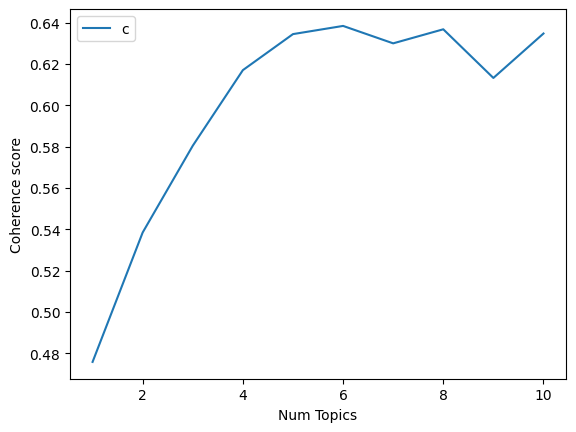

In [55]:
''' Menampilkan grafik nilai koherensi'''
start=1
limit=11
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf,
                                                        texts=text_list, start=start, limit=limit, step=step)


x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [56]:
'''Print the coherence scores'''

for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 15))

Num Topics = 1  has Coherence Value of 0.475919570218303
Num Topics = 2  has Coherence Value of 0.53849309518968
Num Topics = 3  has Coherence Value of 0.580438596217068
Num Topics = 4  has Coherence Value of 0.616973759511349
Num Topics = 5  has Coherence Value of 0.634390964439759
Num Topics = 6  has Coherence Value of 0.638346059357214
Num Topics = 7  has Coherence Value of 0.629922719519073
Num Topics = 8  has Coherence Value of 0.636717073334034
Num Topics = 9  has Coherence Value of 0.613196007827826
Num Topics = 10  has Coherence Value of 0.634675920005464


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
model =  gensim.models.wrappers.ldamallet.LdaMallet(mallet_path, corpus=corpus_tfidf, id2word=dictionary, num_topics=6) # num_topics diganti sesuai nilai coherence tertinggi
lda_gensim = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(model, iterations=1000)

for idx, topic in lda_gensim.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic: 0 Word: 0.231*"pakai" + 0.128*"anak" + 0.103*"pusing" + 0.026*"convomfs" + 0.026*"moga" + 0.026*"program" + 0.026*"libur" + 0.026*"yah" + 0.026*"iyaa" + 0.026*"ikut"
Topic: 1 Word: 0.109*"murid" + 0.036*"anjing" + 0.036*"modul" + 0.036*"tanggal" + 0.036*"masuk" + 0.036*"gaa" + 0.036*"hahaha" + 0.036*"tempoindonesiana" + 0.018*"zaman" + 0.018*"tim"
Topic: 2 Word: 0.136*"lelah" + 0.091*"repot" + 0.091*"yh" + 0.045*"bagus" + 0.045*"capek" + 0.023*"asesmen" + 0.023*"didik" + 0.023*"seni" + 0.023*"senang" + 0.023*"bangun"
Topic: 3 Word: 0.160*"ya" + 0.060*"projek" + 0.060*"ribet" + 0.060*"fuck" + 0.060*"sungguh" + 0.040*"susah" + 0.040*"muak" + 0.040*"fak" + 0.040*"nya" + 0.020*"sukses"
Topic: 4 Word: 0.133*"bikin" + 0.111*"kah" + 0.111*"schfess" + 0.067*"jurus" + 0.044*"kangen" + 0.044*"gegara" + 0.044*"salah" + 0.044*"tanyakanrl" + 0.022*"seru" + 0.022*"inovatif"
Topic: 5 Word: 0.143*"jajah" + 0.122*"sekolah" + 0.082*"korban" + 0.061*"convomfs" + 0.041*"enih" + 0.041*"bijak" + 0.04

In [65]:
top_words_per_topic = []
for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn = 10)])


df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word','P']).to_csv("/content/top_words_topik_positif.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [66]:
'''untuk melihat data probabilitas words topik'''
top_words_topic = pd.read_csv('/content/top_words_topik_positif.csv')
top_words_topic.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,Topic,Word,P
0,0,0,pakai,0.230769
1,1,0,anak,0.128205
2,2,0,pusing,0.102564
3,3,0,convomfs,0.025641
4,4,0,moga,0.025641
5,5,0,program,0.025641
6,6,0,libur,0.025641
7,7,0,yah,0.025641
8,8,0,iyaa,0.025641
9,9,0,ikut,0.025641


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


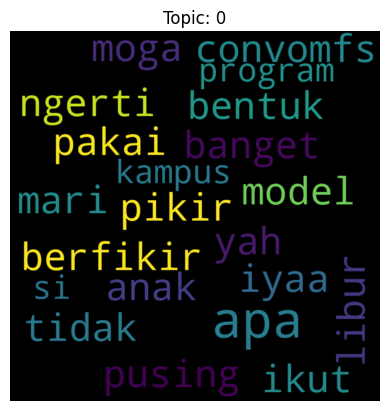

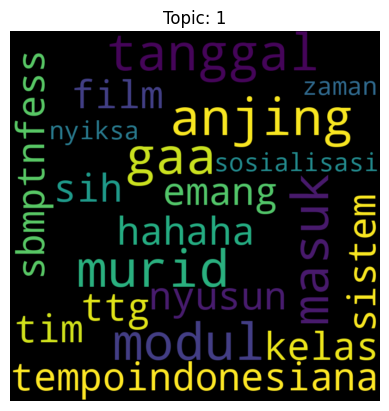

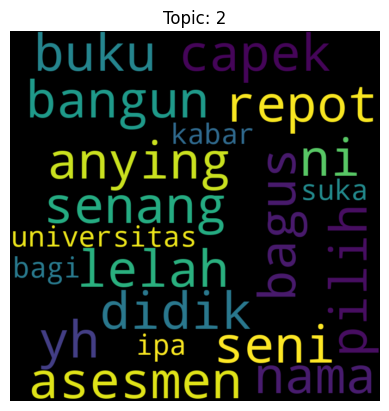

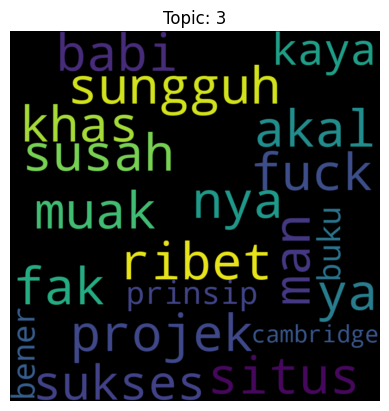

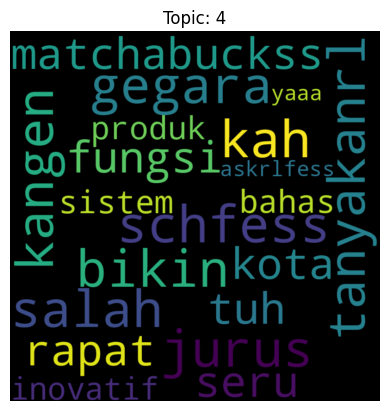

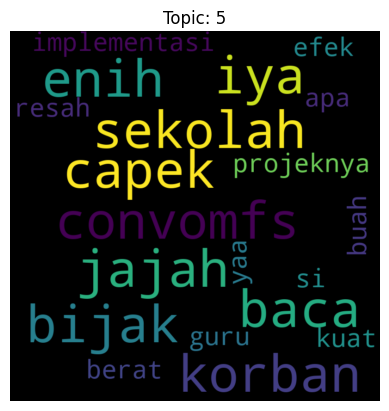

In [67]:
'''membuat wordcloud per topik'''
from wordcloud import WordCloud
for topic_id, topic in enumerate(model.print_topics(num_topics=9, num_words=20)):
    topic_words = " ".join([word.split("*")[1].strip() for word in topic[1].split(" + ")])
    wordcloud = WordCloud(width=800, height=800, random_state=21, max_font_size=110).generate(topic_words)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic: {}".format(topic_id))
    plt.show()

## **PyDlavis Visual**

In [68]:
!pip install pyldavis==3.2.1
import pyLDAvis.gensim
import pickle
import pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
'''Membuat Visualisasi '''
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda_gensim, corpus_tfidf, dictionary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:248: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.254823  0.094462       1        1  16.746956
2      0.179755  0.244469       2        1  16.680593
0      0.103877 -0.212634       3        1  16.652326
3     -0.236059  0.170825       4        1  16.648660
4     -0.101378 -0.327408       5        1  16.638406
5      0.308628  0.030286       6        1  16.633059, topic_info=             Term        Freq       Total Category  logprob  loglift
137         pakai  404.000000  404.000000  Default  30.0000  30.0000
80             ya  280.000000  280.000000  Default  29.0000  29.0000
49          jajah  250.000000  250.000000  Default  28.0000  28.0000
138         lelah  239.000000  239.000000  Default  27.0000  27.0000
227         bikin  233.000000  233.000000  Default  26.0000  26.0000
..            ...         ...         ...      ...      ...      ...
134            si   35.715429   80.640641   Topic6  -3.8918   0.9794
449  implementasi   35.715429   80.640641   Topic6  -3.8918   0.9794
0          bupati    0.000000   39.887666   Topic6     -inf     -inf
2          jaring    0.000000    0.000000   Topic6     -inf      NaN
8         bingung    0.000000   67.071038   Topic6     -inf     -inf

[227 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
696       4  0.999031    akal
112       3  1.001665    anak
274       5  1.002503    aneh
145       5  1.002503  angkat
833       4  0.999031     anj
...     ...       ...     ...
80        4  0.999031      ya
718       6  1.007968     yaa
896       5  1.002503    yaaa
451       3  1.001665     yah
525       2  1.002816      yh

[178 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 4, 5, 6])

In [70]:
'''mendownload output visualisasi'''

output_vis = pyLDAvis.gensim.prepare(lda_gensim, corpus_tfidf, dictionary)
pyLDAvis.save_html(output_vis, 'output_filename.html')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:248: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
